In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from scipy.spatial.distance import cdist, pdist
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

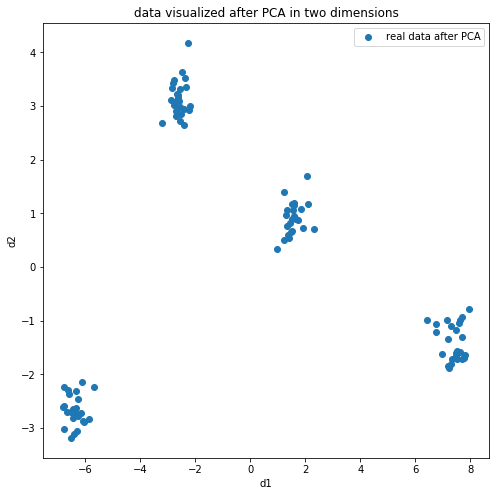

In [3]:
pca = PCA(2)
Xproj = pca.fit_transform(data1)
plt.figure(figsize=(8,8))
plt.scatter(Xproj[:,0],Xproj[:,1],label='real data after PCA')
plt.legend()
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('data visualized after PCA in two dimensions')
plt.show()

### Figure 1. the plot of the real data after PCA in 2 dimensions. It seemed that we could cluster it in 4 clusters.

### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

In [4]:
n = 4
dd = Xproj

km = KMeans(random_state=999,n_clusters=n)
res = km.fit(dd)
print(res.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

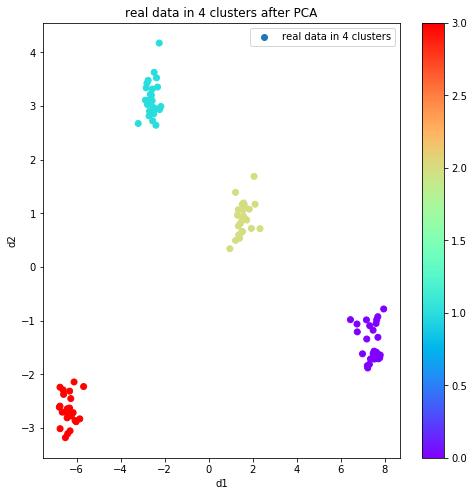

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(Xproj[:,0],Xproj[:,1],label='real data in 4 clusters',c = res.labels_ , cmap = plt.cm.rainbow)
plt.colorbar()
plt.legend()
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('real data in 4 clusters after PCA')
plt.show()

### Figure 2. the plot of the real data in 4 clusters after PCA in 2 dimensions.

### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

### 1. silhouette coefficients

In [6]:
for n in range(2,10):
    km = KMeans(random_state=999,n_clusters=n)
    res = km.fit(dd)
    labels = res.labels_
    silhouette_avg = silhouette_score(dd,labels)
    print('for number of clusters = {}, the average silhouette coefficient is {}'.format(n,silhouette_avg))

for number of clusters = 2, the average silhouette coefficient is 0.603832535067
for number of clusters = 3, the average silhouette coefficient is 0.762249337121
for number of clusters = 4, the average silhouette coefficient is 0.901909648372
for number of clusters = 5, the average silhouette coefficient is 0.782344408352
for number of clusters = 6, the average silhouette coefficient is 0.64503882303
for number of clusters = 7, the average silhouette coefficient is 0.658921901612
for number of clusters = 8, the average silhouette coefficient is 0.500053226285
for number of clusters = 9, the average silhouette coefficient is 0.359444766495


### From the result, we could see that the silhouette coefficient is maximized when n_clusters = 4, so the guess for k is correct

### 2. elbow method

In [7]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

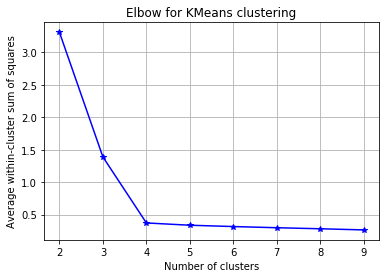

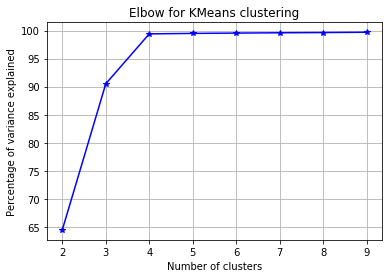

In [8]:
elbow(dd, range(2,10))

### Figure 3. the plot of elbows for kmeans clustering. There is an abrupt change when n_clusters = 4. So the guess is correct.

### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [9]:
n = 4
dd = Xproj
gm = GaussianMixture(n_components=n,random_state=999)
res = gm.fit(dd)
labels = res.predict(dd)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

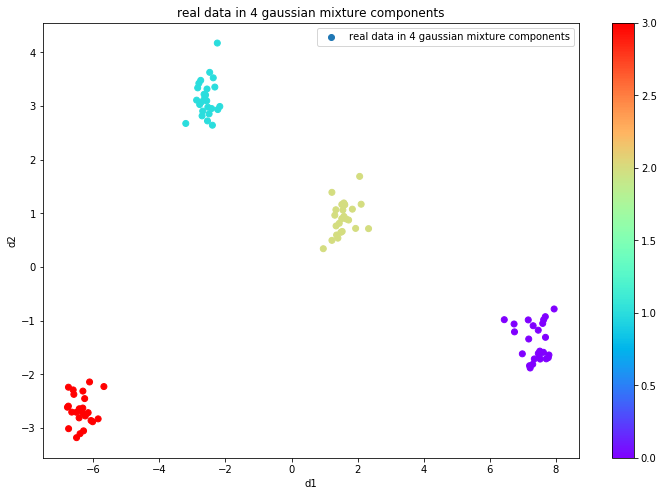

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(Xproj[:,0],Xproj[:,1],label='real data in 4 gaussian mixture components',c = labels , cmap = plt.cm.rainbow)
plt.colorbar()
plt.legend()
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('real data in 4 gaussian mixture components')
plt.show()

### Figure 4. the plot of the real data in 4 gaussian mixture components after PCA in 2 dimensions.

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [11]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.

In [12]:
for x in data2.columns:
    if np.dtype(data2[x]) == 'O':
        data2[x] = pd.factorize(data2[x])[0]

In [13]:
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3781862,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,3781130,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,3781009,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3780501,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,3780511,1,1,1,0,0


In [14]:
km = KMeans(random_state=999,n_clusters=617)
silhouette_score(data2,km.fit_predict(data2))

0.18529411764705883

In [15]:
dd = data2
for n in range(610,625):
    km = KMeans(random_state=999,n_clusters=n)
    label = km.fit_predict(dd)
    silhouette_avg = silhouette_score(dd,label)
    print('for number of clusters = {}, the average silhouette coefficient is {}'.format(n,silhouette_avg))

for number of clusters = 610, the average silhouette coefficient is 0.198548612838
for number of clusters = 611, the average silhouette coefficient is 0.198680588639
for number of clusters = 612, the average silhouette coefficient is 0.196692148919
for number of clusters = 613, the average silhouette coefficient is 0.194144460231
for number of clusters = 614, the average silhouette coefficient is 0.192740496519
for number of clusters = 615, the average silhouette coefficient is 0.190039601281
for number of clusters = 616, the average silhouette coefficient is 0.187994916695
for number of clusters = 617, the average silhouette coefficient is 0.185294117647
for number of clusters = 618, the average silhouette coefficient is 0.185294117647
for number of clusters = 619, the average silhouette coefficient is 0.185294117647
for number of clusters = 620, the average silhouette coefficient is 0.185294117647
for number of clusters = 621, the average silhouette coefficient is 0.185294117647
for 

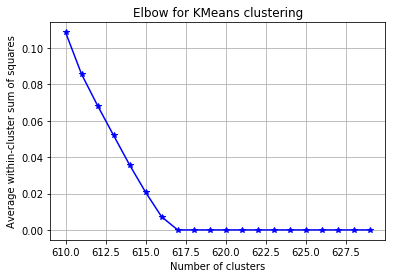

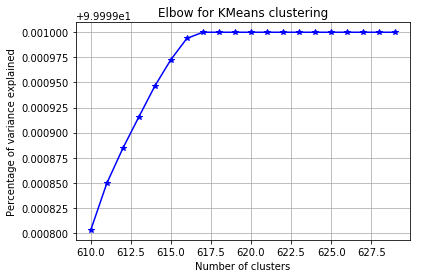

In [16]:
elbow(data2, range(610,630))

### Figure 5. elbow method for kmeans clustering

## From the result we could see that 617 is the exact number

### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [17]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


In [18]:
data2 = pd.DataFrame.drop_duplicates(data2)
data2.shape

(617, 29)

## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

## a, d, f, g

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [40]:
data4 = pd.read_csv('hw4data4.csv')

#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

#### c) Use your trained model to predict labels for the test data. (3 pts)

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

In [41]:
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


In [42]:
train, test = train_test_split(data4, test_size=0.5)

In [43]:
logit = LogisticRegression(C=10000)

### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

In [44]:
logit.fit(train[['x1','x2','x3']],train.y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
logit.intercept_

array([-6.27092334])

In [46]:
logit.coef_

array([[-27.16728841, -75.08313298, -30.78552825]])

### c) Use your trained model to predict labels for the test data. (3 pts)

In [47]:
labelPred = logit.predict(test[['x1','x2','x3']])
labelActual = test.y

### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

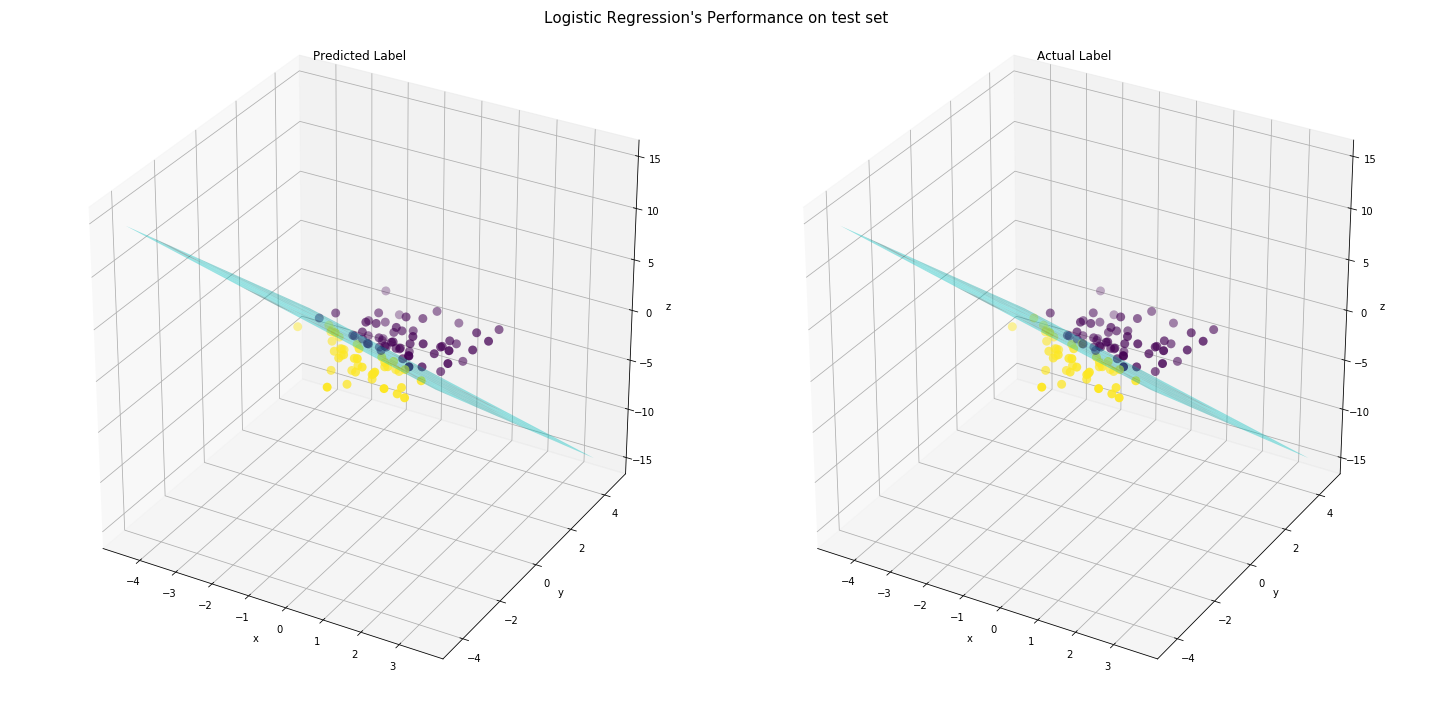

In [49]:
fig2 = plt.figure(figsize = (20,10))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 15)
ax1, ax2 = fig2.add_subplot(121,projection='3d'), fig2.add_subplot(122,projection='3d')

#decision boundary
x1plot = np.arange(np.min(test.x1)-2,np.max(test.x1)+2)
x2plot = np.arange(np.min(test.x2)-2,np.max(test.x2)+2)
x1plot,x2plot = np.meshgrid(x1plot,x2plot)
x3plot = -(logit.intercept_[0] + logit.coef_[0][0]*x1plot + logit.coef_[0][1]*x2plot)/logit.coef_[0][2]
ax1.plot_surface(x1plot,x2plot,x3plot,color='c', alpha = 0.4)
ax2.plot_surface(x1plot,x2plot,x3plot,color='c', alpha = 0.4)

ax1.set(title='Predicted Label')
ax2.set(title='Actual Label')
ax1.scatter(test.x1,test.x2,test.x3, lw = 0, s = 80, c = labelPred)
ax2.scatter(test.x1,test.x2,test.x3, lw = 0, s = 80, c = labelActual)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

#ax1.view_init(azim=120,elev=5)
#ax2.view_init(azim=20,elev=5)

plt.tight_layout()

### Figure 6. plots of the predicted labels and the actual labels

### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [28]:
print('confusion matrix:\n {}'.format(confusion_matrix(labelPred, labelActual)))

#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
Prec1 = 100.0 * TN/(TN+FN)
print('\nPrecision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

confusion matrix:
 [[57  0]
 [ 0 43]]

Precision = 100.00%
Accuracy = 100.00%
Recall = 100.00%


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy
    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

## (a) (b)

In [29]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame(np.concatenate((Y.reshape(len(Y),1),X),axis=1))
data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


In [30]:
logit.fit(X,Y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logit.intercept_

array([  0.87208341,   7.31587251, -39.73405174])

In [32]:
logit.coef_

array([[  1.46087061,   4.77471764,  -7.57810713,  -3.7044055 ],
       [ -0.25179062,  -2.77834529,   1.29855399,  -2.70319061],
       [ -2.49975486,  -6.4134906 ,   9.03013556,  17.40361114]])

## (c)

In [33]:
labelPred = logit.predict(X)
labelActual = Y

In [34]:
labelPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## (d) (e)

In [35]:
print('confusion matrix:\n {}'.format(confusion_matrix(labelPred, labelActual)))

#compute precision, accuracy 
Acc = 100.0 * (sum((labelPred==0)&(labelActual==0))+sum((labelPred==1)&(labelActual==1))+\
              sum((labelPred==2)&(labelActual==2)))/np.sum(confusion_matrix(labelPred, labelActual))
Prec= 100.0 * sum((labelPred==0)&(labelActual==0))/np.sum(confusion_matrix(labelPred, labelActual))
print('\nPrecision with respect to the class labeled 0 = %.2f%%\nAccuracy = %.2f%%'%(Prec,Acc))

confusion matrix:
 [[50  0  0]
 [ 0 48  1]
 [ 0  2 49]]

Precision with respect to the class labeled 0 = 33.33%
Accuracy = 98.00%


## (f)

In [36]:
pca = PCA(2)
Xproj = pca.fit_transform(X)

In [37]:
X.shape

(150L, 4L)

In [38]:
Xproj.shape

(150L, 2L)

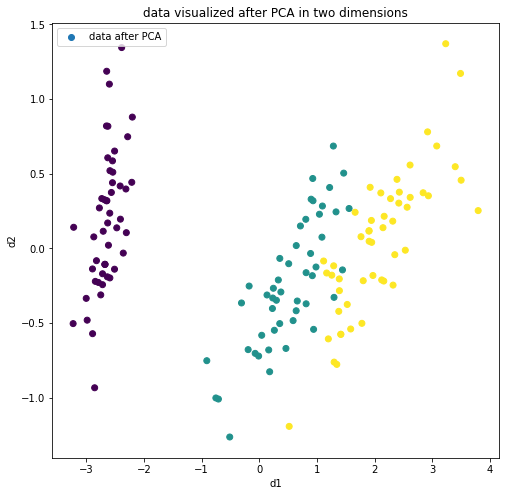

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(Xproj[:,0],Xproj[:,1],label='data after PCA',c=labelPred)
plt.legend()
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('data visualized after PCA in two dimensions')
plt.show()

### Figure 7. scatter plot of the data after PCA in two dimensions